# SimuPark: Un parque simulado

Desarrollado por: 
> Daniel David Delgado Cervantes - 2182066

258.8464332027985


Text(0, 0.5, 'Frecuencia')

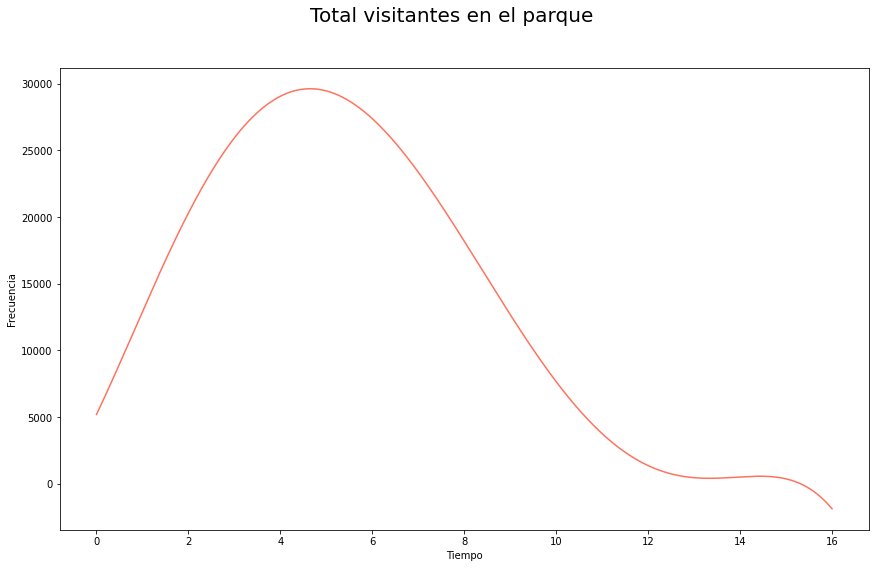

In [13]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

fig = gcf()
fig.set_size_inches(14.5, 8.5)

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (0.374974200206538 + 1.18610051004199 * ((x+0.5) ** 1 ) + 0.328707107843164 * ((x+0.5) ** 2 ) + -0.104475271890136 * ((x+0.5) ** 3 ) + 0.00811912062395833 * ((x+0.5) ** 4 ) + -0.00019811264586807 * ((x+0.5) ** 5 )) / 10
print(sum(fn(x, k)))

plot(x, fn(x,k) * 50000, color='#ff725e')
fig.suptitle('Total visitantes en el parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')

In [15]:
from simuPark.park import Activity, Attraction, Park
from simuPark.person import Person, Archetype
import random

park = Park(
    fn=fn
)

park.start_day(max_entry_rate=150)

Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:25<00:00, 37.22it/s] 


39091
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['Dropper', 'Tornado', 'BumpCars', 'SlowRiver', 'StarWarsRide', 'SpaceMountain']
['Tourist']


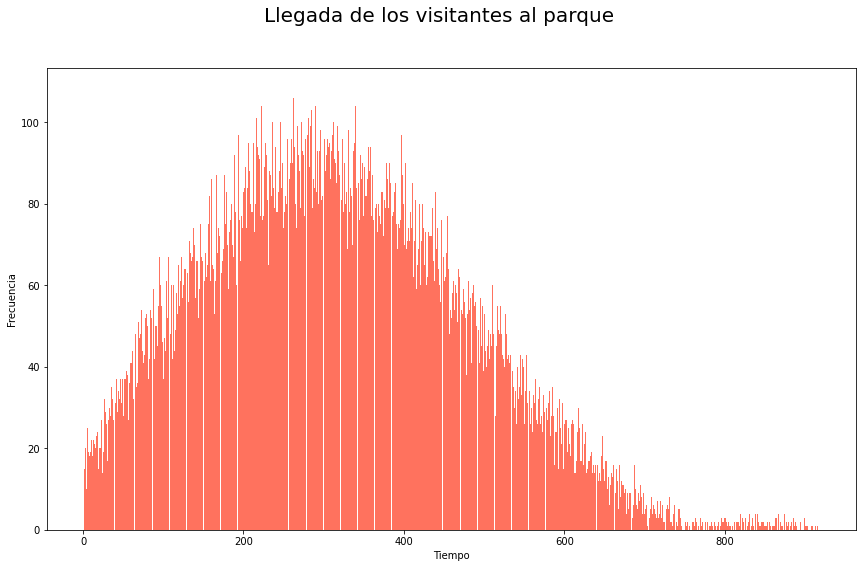

In [ ]:
print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [9]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,total_wait_time,average_wait_time
0,Tourist,1,418,417,108,12,154,12.833333
1,Tourist,1,325,324,97,11,139,12.636364
2,Tourist,1,373,372,40,4,44,11.000000
3,Tourist,1,372,371,83,8,89,11.125000
4,Tourist,1,542,541,62,5,67,13.400000
...,...,...,...,...,...,...,...,...
39642,Tourist,939,960,21,100,0,20,0.000000
39643,Tourist,940,960,20,72,0,19,0.000000
39644,Tourist,940,960,20,60,0,13,0.000000
39645,Tourist,943,960,17,81,0,0,0.000000


Atracciones experimentadas promedio: 2.3675940172018057


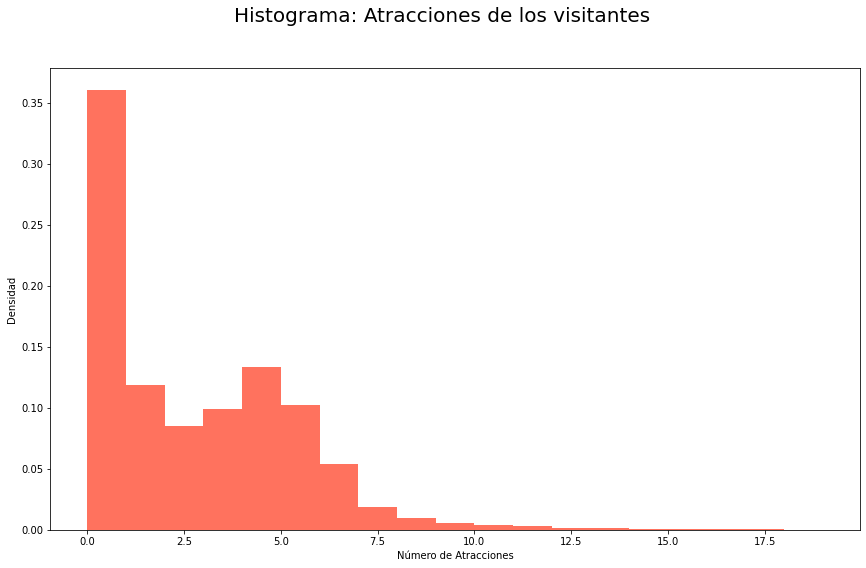

In [10]:
attrExp = [guest.attractions_experienced for guest in park.guests]
attrExp

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(attrExp, bins=np.max(guest_df['attractions_experienced']), density=True, color="#ff725e");
fig.suptitle('Histograma: Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')

66.28582941296385


Text(0, 0.5, 'Densidad')

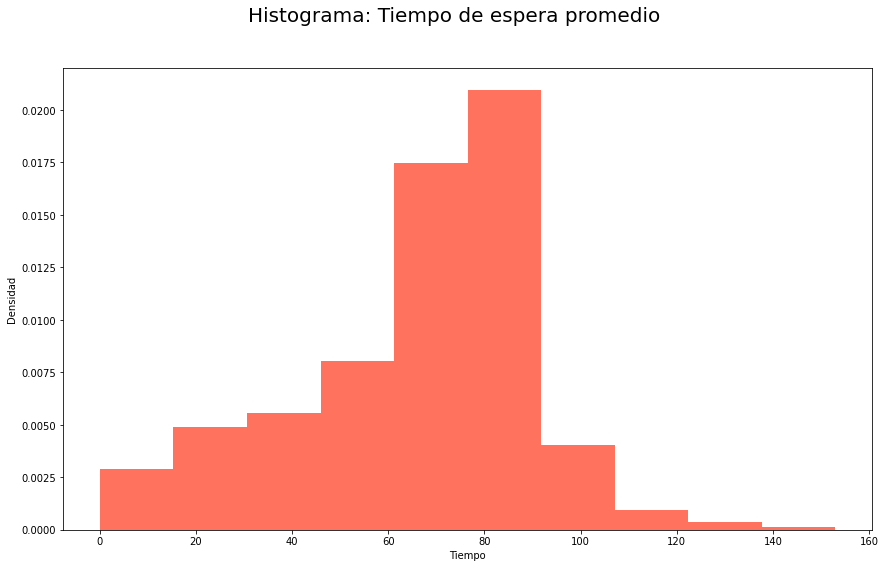

In [ ]:
avgWaitTime = []

for guest in park.guests:
    if guest.attractionsExperienced == 0:
        continue

    avgWaitTime.append(guest.totalWaitTime / guest.attractionsExperienced)

print(np.mean(avgWaitTime))

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(avgWaitTime, density=True, color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')


In [6]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,Dropper,55
1,Tornado,55
2,BumpCars,45
3,SlowRiver,45
4,StarWarsRide,60
5,SpaceMountain,60
